In [1]:
!pip install pillow --quiet   # run once

from pathlib import Path
import re, os
from PIL import Image, ImageDraw, ImageFont, ImageColor


Created 6 images


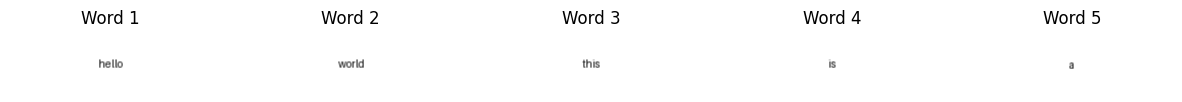

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os
import re
import matplotlib.pyplot as plt

def create_word_images(text):
    """Simple function to create word images"""
    
    # Create output directory
    output_dir = "word_images"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Extract words
    words = re.findall(r'\b\w+\b', text.lower())
    
    # Use default font
    try:
        font = ImageFont.load_default()
    except:
        font = None
    
    created_files = []
    
    for i, word in enumerate(words):
        # Create image
        img = Image.new('RGB', (200, 60), color='white')
        draw = ImageDraw.Draw(img)
        
        # Draw text (centered)
        if font:
            bbox = draw.textbbox((0, 0), word, font=font)
            x = (200 - (bbox[2] - bbox[0])) // 2
            y = (60 - (bbox[3] - bbox[1])) // 2
            draw.text((x, y), word, fill='black', font=font)
        else:
            draw.text((50, 25), word, fill='black')
        
        # Save image
        filename = f"{output_dir}/word_{i+1:03d}_{word}.png"
        img.save(filename)
        created_files.append(filename)
    
    print(f"Created {len(created_files)} images")
    return created_files

# Test the function
my_text = "Jews suck."
files = create_word_images(my_text)

# Display first few images
fig, axes = plt.subplots(1, min(5, len(files)), figsize=(15, 3))
if len(files) == 1:
    axes = [axes]

for i in range(min(5, len(files))):
    img = plt.imread(files[i])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Word {i+1}")

plt.show()